# Introduction

In this research project I am investigating a Dataset from https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction.

According to the source, the data was obtained by using Octoparse scraping tool to extract data from the website. Data was collected in two parts: one for economy class tickets and another for business class tickets. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.
Data source was secondary data and was collected from Ease my trip website.

The description of the features of the dataset is below:

The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

I have chosen this dataset, since I had a personal interest, on how price of the ticket is affected by various conditions. I could not find a dataset from Kazakhstan myself, thus I will investigate this data set





### Research questions

1) What are the most top five expensive flying companies in average in Economy class and Business class

2) After which date prices increases singificantly?(When to buy the ticket?)Does the time differs between the the classes?

3) Which companies' prices are affected the most by the duration of the flight, given the days_left intervals from Q2 (before that critical day, after that critical day) 

4) Which companies' prices are affected the most by the days left before the flight, given the duration of the flight is split to the intervals (according to quartiles)

### Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style = "ticks")

In [5]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585


In [266]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df = pd.read_csv("Clean_Dataset.csv")
df.drop("Unnamed: 0",axis = 1, inplace = True)
df["stops"] = df["stops"].map({"zero":0,
                              "one":1,
                              "two_or_more":2})
dfE = df[df["class"]== "Economy"]
dfB = df[df["class"]=="Business"]
dfE = dfE.reset_index(drop= True) #dataframe for Economy class
dfB = dfB.reset_index(drop= True) #dataframe for Business class

Here i split the data to use two separate DataFrames from Business and Ecomony Classes

## Question One

What are the most top five expensive flying companies in average in Economy class and Business class

SpiceJet average price of flight is  and std 2999.630406204393
AirAsia average price of flight is  and std 2824.0551717933286
Vistara average price of flight is  and std 3854.572558648104
GO_FIRST average price of flight is  and std 2513.865560095008
Indigo average price of flight is  and std 3268.8948311102426
Air_India average price of flight is  and std 3989.521406424231


,price_avg,std
AirAsia,4091.072742,2824.055172
Indigo,5324.216303,3268.894831
GO_FIRST,5652.007595,2513.865560
SpiceJet,6179.278881,2999.630406
Air_India,7313.682169,3989.521406
Vistara,7806.943645,3854.572559


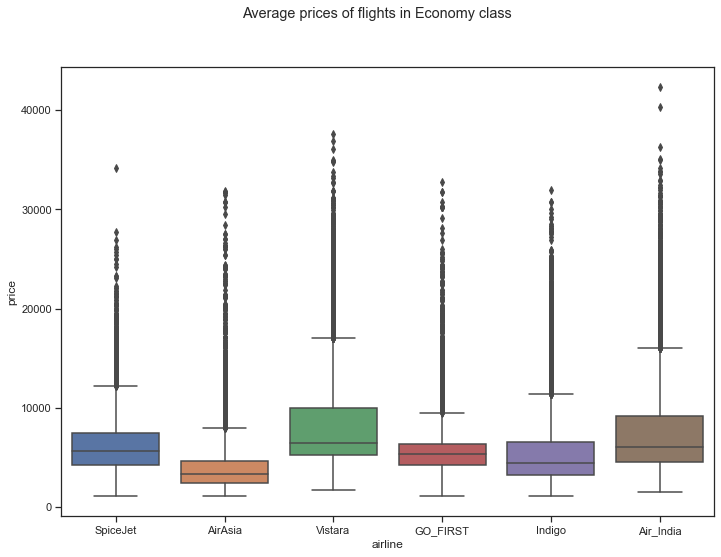

In [225]:
companiesE = dfE["airline"].unique()  ## here im creating dataframe which will contain the resulting information, and lists which
                                      ## will be appended to the dataframe
avglist = []
sizelist = []
dfETop5 = pd.DataFrame(columns=dfE["airline"].unique())
for airline in companiesE:
    avg = dfE[dfE["airline"]==airline]["price"].mean()
    std = dfE[dfE["airline"]==airline]["price"].std()
    print(airline + " average price of flight is " + " and std " + str(std)) ##printed version of dataframe
    dfETop5[airline] = pd.Series([avg,std])
dfETop5 = dfETop5.T
dfETop5 = dfETop5.rename(columns={0:"price_avg",
                                 1:"std"})
dfETop5 = dfETop5.sort_values(by="price_avg")

sns.boxplot(x = dfE["airline"],y = dfE["price"],data = dfE) ##boxplot to visualise median, quartiles and outliers of the data
plt.suptitle("Average prices of flights in Economy class")
dfETop5 ## resulting dataframe

Air_India average price of flight is  and std 10521.926556437282
Vistara average price of flight is  and std 13225.349061857947


,price_avg,std
Air_India,47131.039212,10521.926556
Vistara,55477.027777,13225.349062


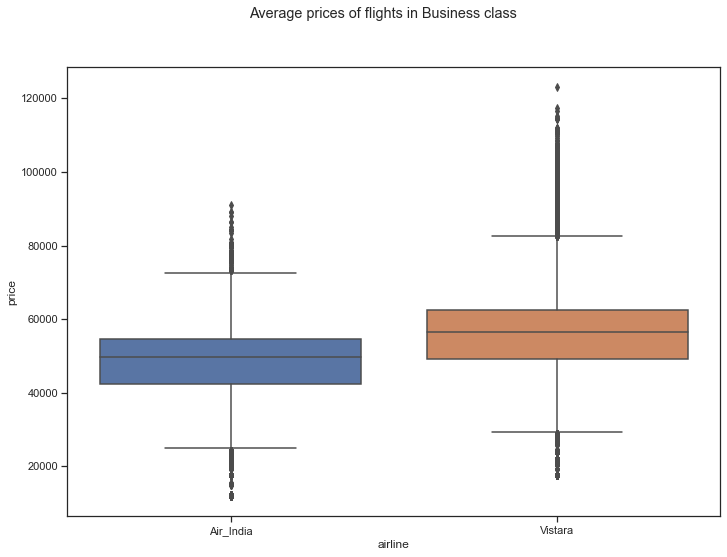

In [192]:
companiesB = dfB["airline"].unique() ##same procedure as in previous cell, but for business class
avglist = []
sizelist = []
dfBTop5 = pd.DataFrame(columns=dfB["airline"].unique())
for airline in companiesB:
    avg = dfB[dfB["airline"]==airline]["price"].mean()
    std = dfB[dfB["airline"]==airline]["price"].std()
    print(airline + " average price of flight is " + " and std " + str(std))
    dfBTop5[airline] = pd.Series([avg,std])
dfBTop5 = dfBTop5.T
dfBTop5 = dfBTop5.rename(columns={0:"price_avg",
                                 1:"std"})
dfBTop5 = dfBTop5.sort_values(by="price_avg")


sns.boxplot(x = dfB["airline"],y = dfB["price"],data = dfB)
plt.suptitle("Average prices of flights in Business class")
dfBTop5

### Discussion

From this table and data we may conclude that Air Asia is the cheapest flight company in Economy class, while Vistara is the most expensive. As a traveller, I would check Air Asia's prices first. 

In terms of business classes flights, Air India seems to be cheaper than Vistara, but Vistara's standard deviation is higher.


## Question Two

 After which date prices increases singificantly?(When to buy the ticket?)Does the time differs between the the classes?

C:\Users\zhand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1, 'Prices distribution in Economy class')

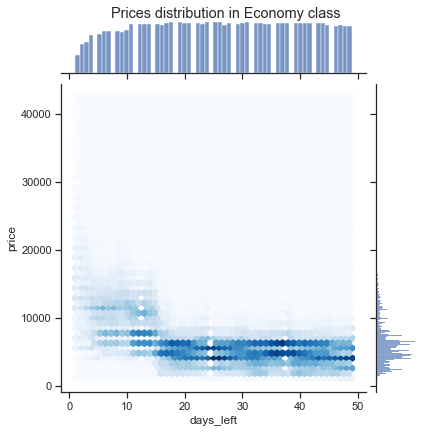

In [250]:
sns.jointplot(dfE["days_left"],dfE["price"],kind = "hex",cmap = "Blues") ##could also used kind = "hist", but hex gives more color
plt.suptitle("Prices distribution in Economy class",y = 1)              ## for me personally

### Discussion

It seems that in Economy class significant price changes occures at t = 15,10,5 days before flight. Thus it is good to know, that buying a ticket during this period can be costly. Approaching t = 2-3 days, price of the tickets starts to vary a lot. But still, the darkest areas are increased comparing to previous timestamps, indicating price change. For sure it is known from the intuition that during this time price should be at its highest. To conclude, buying a ticket from 15-50 days does not make that difference as buying it from 0-10 days, Thus in further analysis, we will divide our time intervals as

1) 0-5 
2) 5-10
3) 10-15
4) 15-50

since inside of thess intervals price averages are to some extent the same.

In the Business class the price is more volatile. Most of the prices lie in the same area, however, as 10 days border passes in, prices start to rise. Thus, we will analyze price intervals as

1) 10-50
2) 5-10
3) 0-5



## Question three
Which companies' prices are affected the most by the duration of the flight, keeping the days_left border from Q2 (before that critical day, after that critical day)

I will split this part into two depending on the class of the flight for convinience

In order to see the general pattern, I will use both Local Regression(red line) and Linear Regression(orange line) fits. The reason behind that, is that linear fit does not explain well the behavior of the data from 0-10 hours of flight duration. It seems, that cost function of the ticket follows more complex pattern, and for more travelling time, flying companies spend less on fuel. Nevetheless, Linear fit might be usefull in describing general pattern of price change during the flight duration change

### Economy class

[Text(0.5, 1.0, 'SpiceJet')]

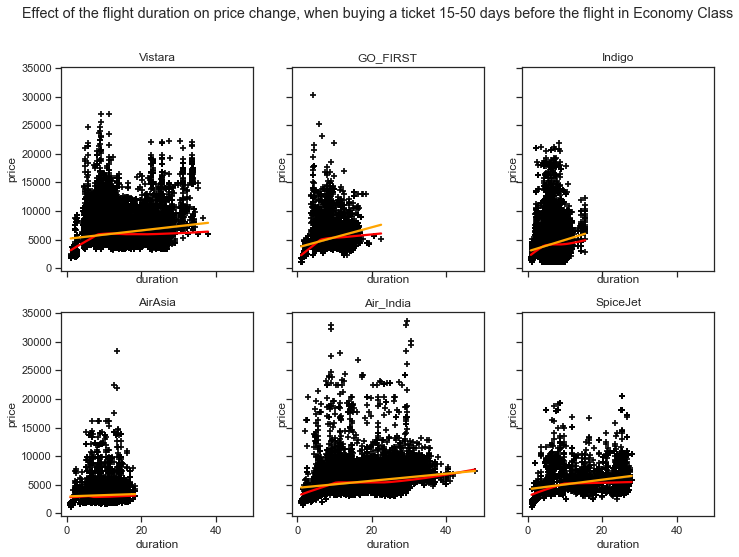

In [295]:
dfE_price_duration = dfE[(dfE["days_left"]>15)&(dfE["days_left"]<50)] #creating a DataFrame with a days_left interval
dfE_price_duration["airline"].unique()
fig,axes = plt.subplots(2,3,sharex = True,sharey = True)    #subplots
plt.suptitle("Effect of the flight duration on price change, when buying a ticket 15-50 days before the flight in Economy Class")

sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["duration"],##6 regplots above to create Local Regression line
            y = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Indigo")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="AirAsia")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="SpiceJet",) ##6 same regplots, but with Linear Regression line
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Indigo")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="AirAsia")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="SpiceJet",)

Here we can see that AirAsia's price more or less constant, while other companies increase their pricings as the duration increases. SpiceJet and Vistara nevetheless, tend to increase their pricings up to specific value, after which change is not that big. 

[Text(0.5, 1.0, 'SpiceJet')]

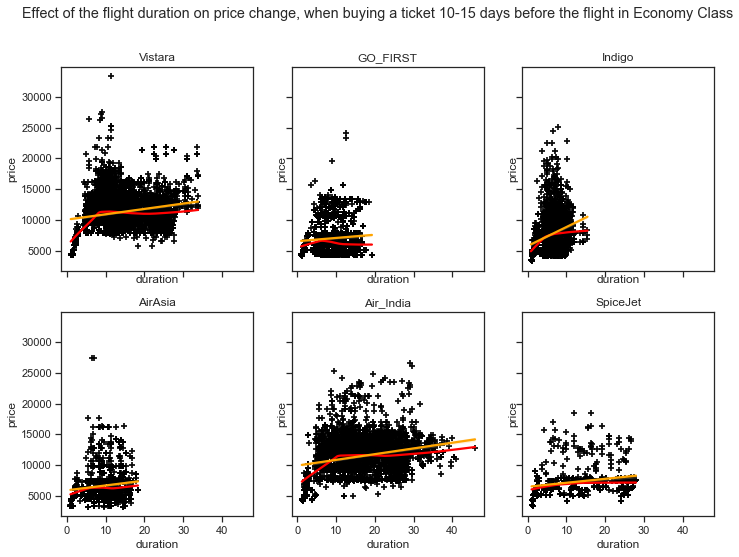

In [296]:
dfE_price_duration = dfE[(dfE["days_left"]>10)&(dfE["days_left"]<15)] ##Same procedure as in previous cell, but with 10-15 days_left interval
dfE_price_duration["airline"].unique()
fig,axes = plt.subplots(2,3,sharex = True,sharey = True)
plt.suptitle("Effect of the flight duration on price change, when buying a ticket 10-15 days before the flight in Economy Class")

sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Indigo")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="AirAsia")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="SpiceJet",)
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Indigo")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="AirAsia")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="SpiceJet",)

[Text(0.5, 1.0, 'SpiceJet')]

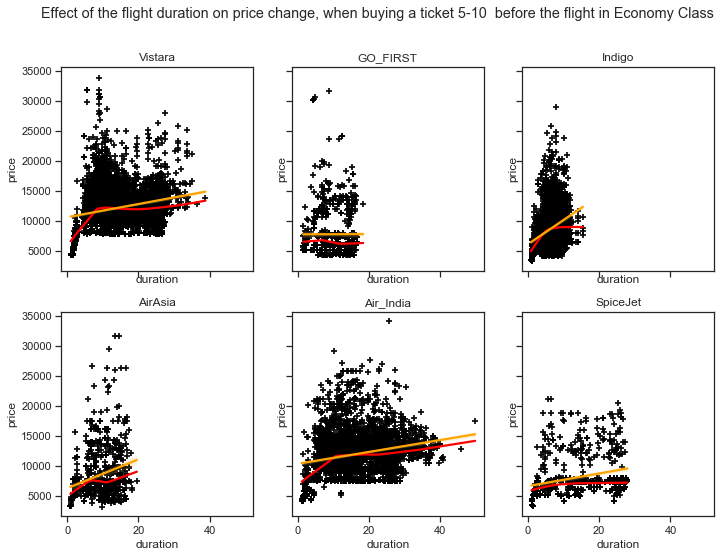

In [297]:
dfE_price_duration = dfE[(dfE["days_left"]>5)&(dfE["days_left"]<10)] ##Same procedure as in previous cell, but with 5-10 days_left interval
dfE_price_duration["airline"].unique()
fig,axes = plt.subplots(2,3,sharex = True,sharey = True)
plt.suptitle("Effect of the flight duration on price change, when buying a ticket 5-10  before the flight in Economy Class")

sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Indigo")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="AirAsia")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="SpiceJet",)
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Indigo")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="AirAsia")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="SpiceJet",)

[Text(0.5, 1.0, 'SpiceJet')]

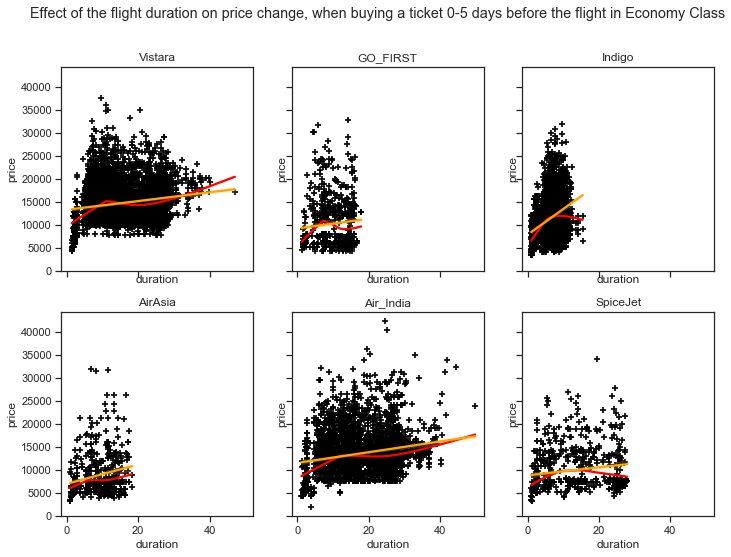

In [298]:
dfE_price_duration = dfE[(dfE["days_left"]<5)]##Same procedure as in previous cell, but with 0-5 days_left interval
dfE_price_duration["airline"].unique()
fig,axes = plt.subplots(2,3,sharex = True,sharey = True)
plt.suptitle("Effect of the flight duration on price change, when buying a ticket 0-5 days before the flight in Economy Class")

sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Indigo")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="AirAsia")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="SpiceJet",)
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Indigo")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="AirAsia")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")
sns.regplot(x = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["duration"],
            y = dfE_price_duration[dfE_price_duration["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="SpiceJet",)

### Business class

In [269]:
dfB["airline"].unique()

array(['Air_India', 'Vistara'], dtype=object)

[Text(0.5, 1.0, 'Air_India')]

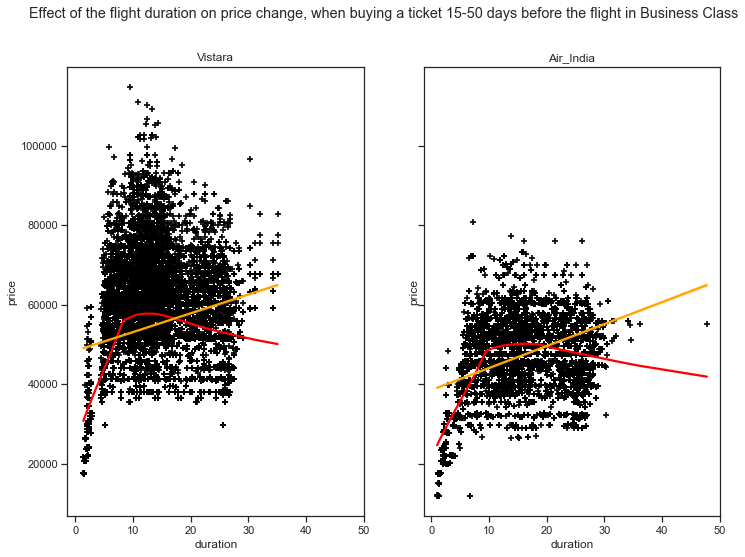

In [299]:
dfB_price_duration = dfB[(dfB["days_left"]>15)&(dfB["days_left"]<50)] ## same procedure as in Economy class, but with the business class now.
dfB_price_duration["airline"].unique()
fig,axes = plt.subplots(1,2,sharex = True,sharey = True)
plt.suptitle("Effect of the flight duration on price change, when buying a ticket 15-50 days before the flight in Business Class")

sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",
            lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",
            lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")

sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")


[Text(0.5, 1.0, 'Air_India')]

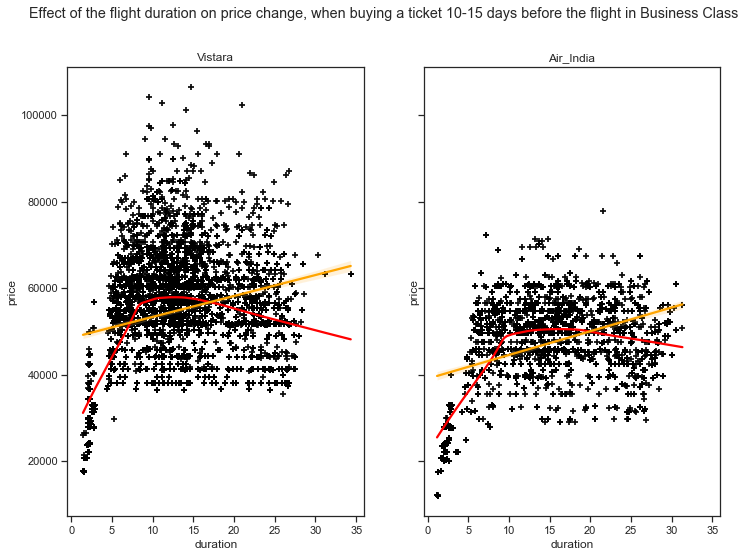

In [300]:
dfB_price_duration = dfB[(dfB["days_left"]>10)&(dfB["days_left"]<15)]
dfB_price_duration["airline"].unique()
fig,axes = plt.subplots(1,2,sharex = True,sharey = True)
plt.suptitle("Effect of the flight duration on price change, when buying a ticket 10-15 days before the flight in Business Class")

sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",
            lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",
            lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")

[Text(0.5, 1.0, 'Air_India')]

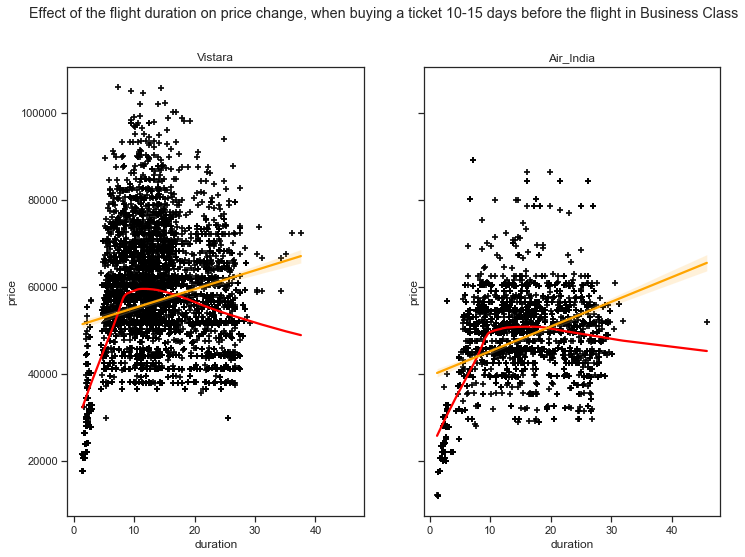

In [301]:
dfB_price_duration = dfB[(dfB["days_left"]>5)&(dfB["days_left"]<10)]
dfB_price_duration["airline"].unique()
fig,axes = plt.subplots(1,2,sharex = True,sharey = True)
plt.suptitle("Effect of the flight duration on price change, when buying a ticket 10-15 days before the flight in Business Class")

sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",
            lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",
            lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")

[Text(0.5, 1.0, 'Air_India')]

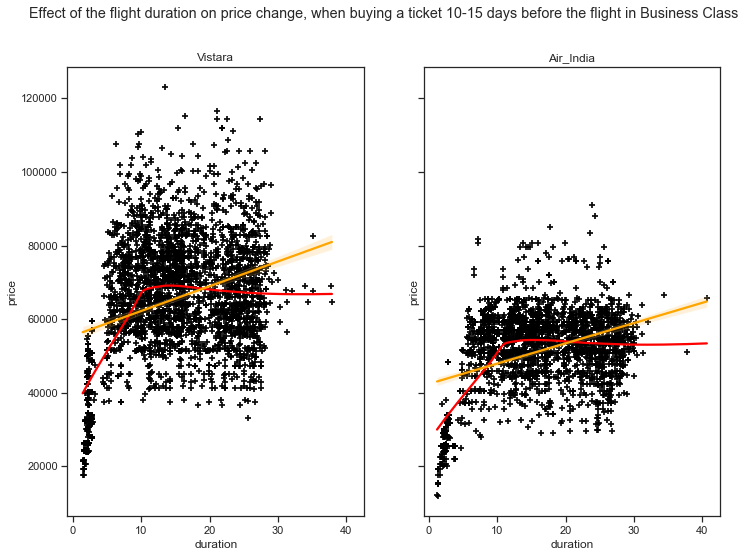

In [302]:
dfB_price_duration = dfB[(dfB["days_left"]<5)]
dfB_price_duration["airline"].unique()
fig,axes = plt.subplots(1,2,sharex = True,sharey = True)
plt.suptitle("Effect of the flight duration on price change, when buying a ticket 10-15 days before the flight in Business Class")

sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",
            lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",
            lowess= True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["duration"],
            y = dfB_price_duration[dfB_price_duration["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")

### DIscussion

### Economy
It can be seen, that the price of the ticket in 5/6 airlines does not vary that much in the price as the duration of the flight increases. However, Indigo airlines have dramatic increase with the change of duration of flight. It seems, this company has very high transportation costs, or may be their airplanes consume more fuel that other companies. This idea can be used somewhere, but as a customer, I would not prefer Indigo for long flights. 

During from 5-10 days from flight chart, Go First airline shows no change or slightly negative change in price, as duration of a flight increases. I believe this might be an error, and should not be considered. Overall, here and in question 4 I try to make inferences on the data, without using regressions, but I highly recommend to use various regression models, to calculate the weights of each category to make even more inferences.
### Business
In the Business class slopes of a linear fit of both companies to some extent the same. 
Local fit also shows, that for flights from with duration from 0-10 hours, the slope between two companies to some extent is the same. After reaching breakpoint at 10 hours, line in Local fit tends to 0 or negative slope. This effect might be caused by the effect of the business class specifications, but I personally do not see any explanation to this effect. As a customer, I would not prefer any of the company, since their pricings changes are similar (while prices itself are not!)

## Question Four

In [205]:
dfE["duration"].describe()

count    206666.000000
mean         11.550060
std           7.241284
min           0.830000
25%           6.250000
50%          10.170000
75%          15.250000
max          49.830000
Name: duration, dtype: float64

Using pandas describe function to obtain information on quartiles.


I will split this part into two depending on the class of the flight for convinience

In order to see the general pattern, I will use both Local Regression(red line) and Linear Regression(orange line) fits. The reason behind that, is that linear fit does not explain well the behavior of the data from 0-10 hours of flight duration. It seems, that cost function of the ticket follows more complex pattern.

Linear fit is to see the overall change, while Local fit is to see the pattern of the data

### Economy

[Text(0.5, 1.0, 'SpiceJet')]

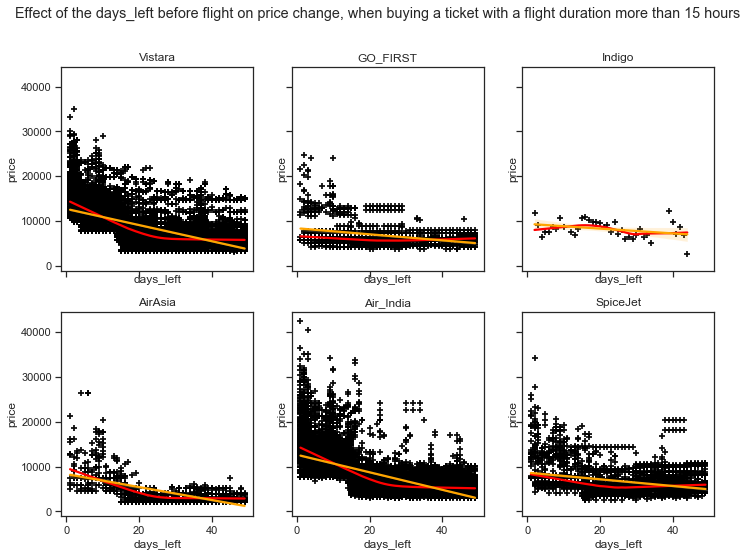

In [303]:
dfE_price_days = dfE[(dfE["duration"]>15)] ##Here, codes below are to show Ceteris-Paribus effect of days_left, and 
dfE_price_days["airline"].unique()         ## using duration intervals with quartiles.
fig,axes = plt.subplots(2,3,sharex = True,sharey = True)
plt.suptitle("Effect of the days_left before flight on price change, when buying a ticket with a flight duration more than 15 hours")

sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Indigo")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="AirAsia")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="SpiceJet")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Indigo")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="AirAsia")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="SpiceJet")



[Text(0.5, 1.0, 'SpiceJet')]

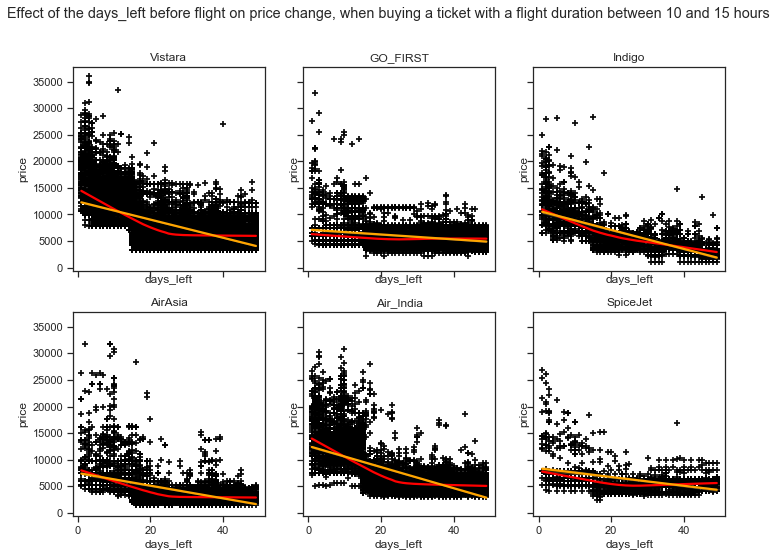

In [307]:
dfE_price_days = dfE[(dfE["duration"]<15)&(dfE["duration"]>10)]
dfE_price_days["airline"].unique()
fig,axes = plt.subplots(2,3,sharex = True,sharey = True)
plt.suptitle("Effect of the days_left before flight on price change, when buying a ticket with a flight duration between 10 and 15 hours")

sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Indigo")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="AirAsia")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="SpiceJet")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Indigo")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="AirAsia")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="SpiceJet")


[Text(0.5, 1.0, 'SpiceJet')]

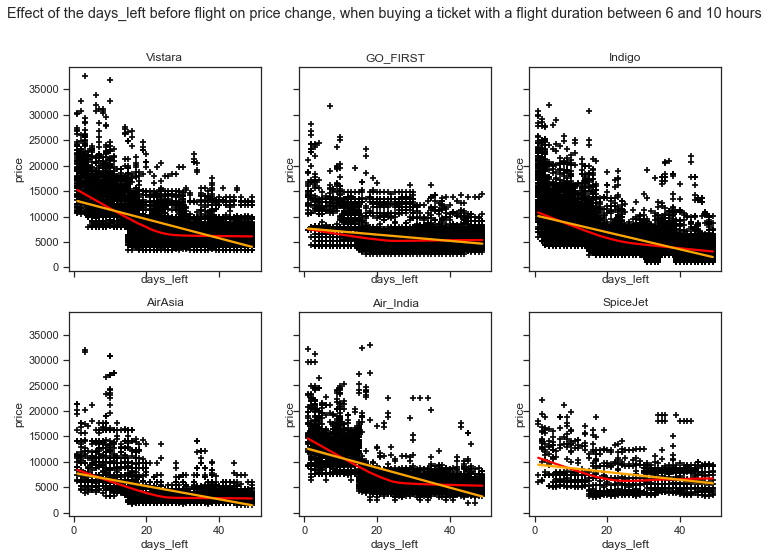

In [308]:
dfE_price_days = dfE[(dfE["duration"]<10)&(dfE["duration"]>6)]
dfE_price_days["airline"].unique()
fig,axes = plt.subplots(2,3,sharex = True,sharey = True)
plt.suptitle("Effect of the days_left before flight on price change, when buying a ticket with a flight duration between 6 and 10 hours")

sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Indigo")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="AirAsia")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="SpiceJet")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Indigo")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="AirAsia")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="SpiceJet")



[Text(0.5, 1.0, 'SpiceJet')]

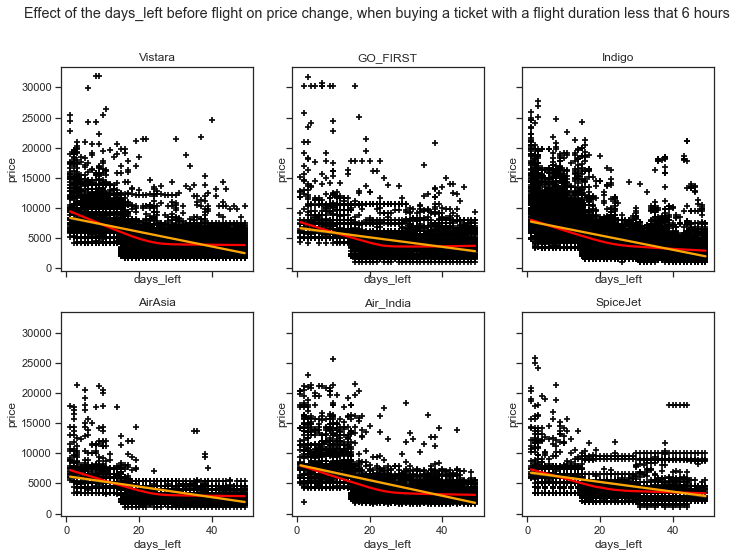

In [309]:
dfE_price_days = dfE[(dfE["duration"]<6)]
dfE_price_days["airline"].unique()
fig,axes = plt.subplots(2,3,sharex = True,sharey = True)
plt.suptitle("Effect of the days_left before flight on price change, when buying a ticket with a flight duration less that 6 hours")

sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Indigo")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="AirAsia")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="SpiceJet")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="GO_FIRST"]["price"],
            ax = axes[0,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="GO_FIRST")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Indigo"]["price"],
            ax = axes[0,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Indigo")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="AirAsia"]["price"],
            ax = axes[1,0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="AirAsia")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1,1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")
sns.regplot(x = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["days_left"],
            y = dfE_price_days[dfE_price_days["airline"]=="SpiceJet"]["price"],
            ax = axes[1,2],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="SpiceJet")


### Business

[Text(0.5, 1.0, 'Air_India')]

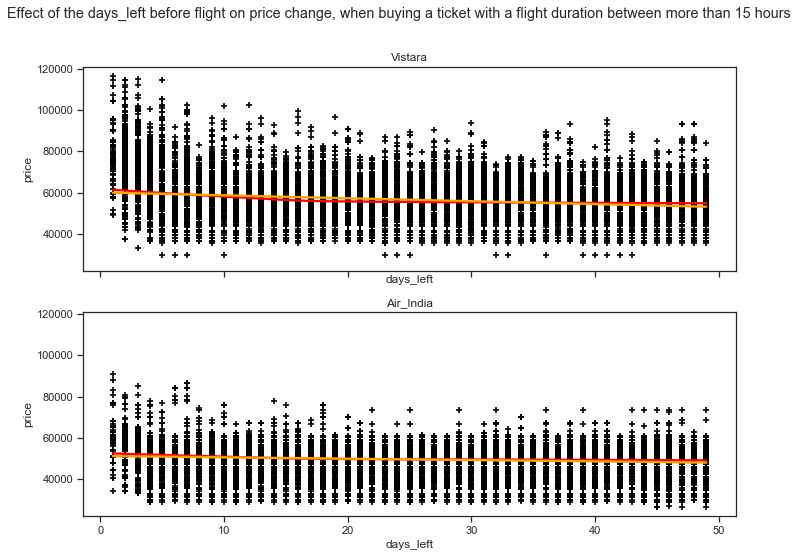

In [316]:
dfB_price_days = dfB[(dfB["duration"]>15)]
dfB_price_days["airline"].unique()
fig,axes = plt.subplots(2,1,sharex = True,sharey = True)
plt.suptitle("Effect of the days_left before flight on price change, when buying a ticket with a flight duration between more than 15 hours")

sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",lowess = True,
            scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")

C:\Users\zhand\AppData\Local\Temp/ipykernel_26292/3370322061.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB_price_days = dfB[(dfB["duration"]<15)&(dfE["duration"]>10)]


[Text(0.5, 1.0, 'Air_India')]

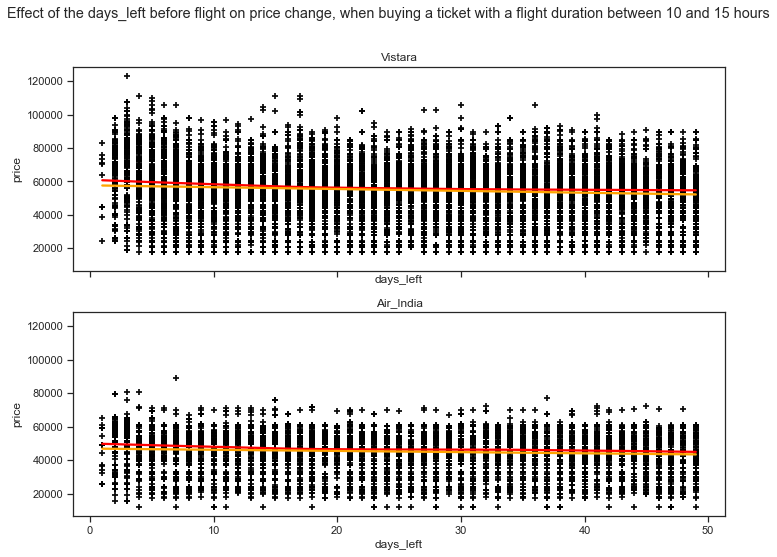

In [314]:
dfB_price_days = dfB[(dfB["duration"]<15)&(dfE["duration"]>10)]
dfB_price_days["airline"].unique()
fig,axes = plt.subplots(2,1,sharex = True,sharey = True)
plt.suptitle("Effect of the days_left before flight on price change, when buying a ticket with a flight duration between 10 and 15 hours")

sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",lowess = True,
            scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")

C:\Users\zhand\AppData\Local\Temp/ipykernel_26292/3855322840.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB_price_days = dfB[(dfB["duration"]<10)&(dfE["duration"]>6)]


[Text(0.5, 1.0, 'Air_India')]

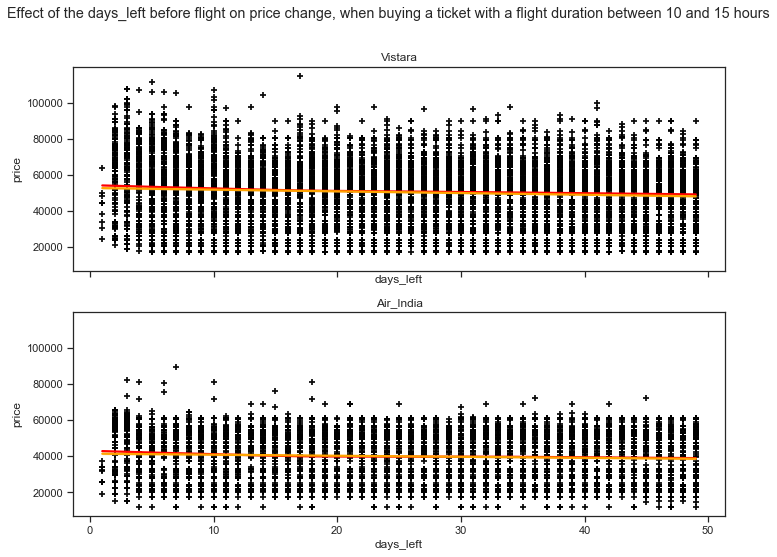

In [317]:
dfB_price_days = dfB[(dfB["duration"]<10)&(dfE["duration"]>6)]
dfB_price_days["airline"].unique()
fig,axes = plt.subplots(2,1,sharex = True,sharey = True)
plt.suptitle("Effect of the days_left before flight on price change, when buying a ticket with a flight duration between 10 and 15 hours")

sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",lowess = True,
            scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")

[Text(0.5, 1.0, 'Air_India')]

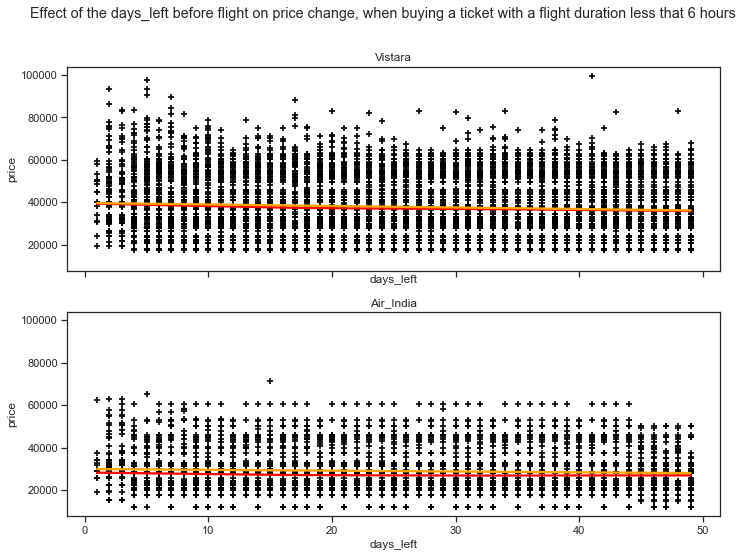

In [318]:
dfB_price_days = dfB[(dfB["duration"]<6)]
dfB_price_days["airline"].unique()
fig,axes = plt.subplots(2,1,sharex = True,sharey = True)
plt.suptitle("Effect of the days_left before flight on price change, when buying a ticket with a flight duration less that 6 hours")

sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",lowess = True,
           scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Vistara")
sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",lowess = True,
            scatter_kws={"color": "black"}, line_kws={"color": "red"}).set(title="Air_India")
sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Vistara"]["price"],
            ax = axes[0],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Vistara")
sns.regplot(x = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["days_left"],
            y = dfB_price_days[dfB_price_days["airline"]=="Air_India"]["price"],
            ax = axes[1],marker = "+",
           scatter_kws={"color": "black"}, line_kws={"color": "orange"}).set(title="Air_India")

### Discussion 

### Economy
In most of the cases, SpaceJet showed a smaller change of the price, as the number of days changes, given a interval of a flight time. As a customer, I would prefer to use this airline, to save more money. Another noticeable difference from Q2, is that price change occurs at a breakpoint of ~20-22 days before flight, rather than ~15 days as I told before. In Q2 I examined all prices from all airlines, and thus, in the interval of 15-20 days, cheap airlines rise their prices, and thus, the instensity color of the heatmap remains the same. Thus it is important to note, that price changes mosly occur at ~20 days before the flight time, and as a customer, plan my flights earlier than this date.

### Business

Business class, however, shows a different picture and trend. I believe it is connected with a demand on a business class flights. It seems, that this demand does not change, with the time. The difference in the price at the moment of flight and 50 days before the flight is not that big, comparing to economy class. I believe, it is connected to the fact, that the demand for business class tickets is low, thus, there is no point in increase in price. As a customer, I would not hurry my self too much for buying tickets in advance, since I can spend more time on planning, in case needed. 

## Conclusion

This research project was conducted from the scope of a customer choice. In this project I have analyzed various questions of my interest, if I would've been a customer of these companies. From the DataSet I tried to generate reasonable answers to my reasonable questions of interest. The methodology used is simple, but representative. In question one I compared all companies in two class segments via average price. Since average price itself had a high standard deviation, I proceeded to a further analysis in questions 3 & 4. In question 2 I tried to find a lower bound limit, after which prices start to change significantly, and it seems, that 15 days is the bound after which most of the prices start to raise. However, there was a slight error, which will be discussed in the next section. In the question 3&4 I tried to analyze the Ceteris-Paribus effects of both days_left and flight duration, since I believe, that these two factors affect the price the most, despite the class itself. It has been found, that companies have differect Ceteris-Paribus effect, and we can find some least expensive companies. For example, if I am buying a ticket very late (5-10 days before flight), I would consider using Go_First airline in this case. Another important insight, is that in business class prices do not vary a lot with the time chage, which suprised me. Finally, Q4 met with the results with the Q1, since the least expensive companies had the least Ceteris-Paribus effects, also Q4 shown, that methodology used in Q2 is not precise, since the actual breakpoint of slope of the price is actually 20-22 days.

### Error analysis

First error which was done is that in the question one we simply measured averages. Given more time and experience, I would have compared all possible routes withing the country, and I would compare the companies on this basis. And I actually tried to do this, by creating 3 nested loops and iterating over all items in DataFrame. Resulting DataFrame consisted of 180 rows, with all possible routes with all possible airlines, however, I could not manage to visualize this data in a proper way, so it gives reasonable answers.

The second error as I said is in question 2. I have used heatmaps to display distributions of prices vs days left to investigate the breakpoint of sudden price changes. Since some of the companies have different pricings, while one company has raised its price, other could leave it unchanged, thus keeping the mean of the distribution at the same point. However, I believe, it anwers one very important general question: at which point ALL companies tend to raise their prices. Some of the companies raise them earlier, while other not. But at the point of ~14-15 days we can be sure that ALL of them have raised their prices.

In the third and fourth question for the sake of simplicity, I split the intervals choosing the breakpoints by myself. For sure, to investigate TRUE Ceteris-Paribus effect, I should have taken 50 plots (in days) with 6 sublots in each resulting in 300 sublots, and this is for the price-duration effect Only. Analyzing this would've been too time consuming and useless, unless we're interested in a specific time-stamp, for example 1-2 days before flight change in pricings. The same applies to question four